In [2]:
import pandas as pd

url = "https://drive.google.com/uc?id=16UqB9kQq5UW0SvVeKoRgW54D4wL6IwPe"
df = pd.read_csv(url)
df

,ReviewText
0,This product is amazing and very useful!
1,I didn’t like the quality of the material.
2,Good value for money.
3,"Terrible experience, won’t buy again."
4,Absolutely loved it!
5,The product broke after one week.
6,Really happy with the performance.
7,Not worth the price.
8,Excellent build quality and fast delivery.
9,Disappointing experience overall.


. بررسی کنید که فایل شامل ستون زیر باشد:
ReviewText : شامل متن نظرات کاربران درباره یک محصول یا سرویس

In [3]:
if "ReviewText" in df.columns:
    print("checked")

checked


. از وجود مقادیر خالی ) NaN ( در ستون ReviewText مطمئن شوید و در صورت وجود، آنها را حذف یا با مقدار مناسب جایگزین کنید.

In [9]:
if df.ReviewText.isna().sum() > 0:
    df.ReviewText.dropna(inplace=True)
df

,ReviewText
0,This product is amazing and very useful!
1,I didn’t like the quality of the material.
2,Good value for money.
3,"Terrible experience, won’t buy again."
4,Absolutely loved it!
5,The product broke after one week.
6,Really happy with the performance.
7,Not worth the price.
8,Excellent build quality and fast delivery.
9,Disappointing experience overall.


یک ستون جدید به نام TextLength ایجاد کنید که تعداد کاراکترهای هر متن را نشان میدهد

In [13]:
df["TextLength"] = df.ReviewText.map(lambda x: len(x))
df

,ReviewText,TextLength
0,This product is amazing and very useful!,40
1,I didn’t like the quality of the material.,42
2,Good value for money.,21
3,"Terrible experience, won’t buy again.",37
4,Absolutely loved it!,20
5,The product broke after one week.,33
6,Really happy with the performance.,34
7,Not worth the price.,20
8,Excellent build quality and fast delivery.,42
9,Disappointing experience overall.,33


یک ستون دیگر با نام WordCount اضافه کنید که تعداد کلمات هر متن را محاسبه میکند.

In [14]:
df["WordCount"] = df.ReviewText.map(lambda x: str.count(x," ") + 1)
df

,ReviewText,TextLength,WordCount
0,This product is amazing and very useful!,40,7
1,I didn’t like the quality of the material.,42,8
2,Good value for money.,21,4
3,"Terrible experience, won’t buy again.",37,5
4,Absolutely loved it!,20,3
5,The product broke after one week.,33,6
6,Really happy with the performance.,34,5
7,Not worth the price.,20,4
8,Excellent build quality and fast delivery.,42,6
9,Disappointing experience overall.,33,3


تمام متون موجود در ستون ReviewText را به یک متن بزرگ ترکیب کنید

In [20]:
whole_text = " ".join(df.ReviewText)
whole_text

'This product is amazing and very useful! I didn’t like the quality of the material. Good value for money. Terrible experience, won’t buy again. Absolutely loved it! The product broke after one week. Really happy with the performance. Not worth the price. Excellent build quality and fast delivery. Disappointing experience overall.'

متن را به لیستی از کلمات ) tokens ( تبدیل کنید.

In [55]:
word_list = pd.Series( whole_text.replace("!","").replace(".","").replace(",","").replace("’","").lower().split(" "))
word_list

0              this
1           product
2                is
3           amazing
4               and
5              very
6            useful
7                 i
8             didnt
9              like
10              the
11          quality
12               of
13              the
14         material
15             good
16            value
17              for
18            money
19         terrible
20       experience
21             wont
22              buy
23            again
24       absolutely
25            loved
26               it
27              the
28          product
29            broke
30            after
31              one
32             week
33           really
34            happy
35             with
36              the
37      performance
38              not
39            worth
40              the
41            price
42        excellent
43            build
44          quality
45              and
46             fast
47         delivery
48    disappointing
49       experience


فراوانی )تعداد تکرار( هر کلمه را محاسبه کنید.

In [56]:
group_word = word_list.value_counts()
group_word

the              5
and              2
product          2
experience       2
quality          2
is               1
this             1
useful           1
i                1
very             1
amazing          1
like             1
didnt            1
material         1
of               1
value            1
for              1
money            1
good             1
terrible         1
wont             1
buy              1
again            1
absolutely       1
loved            1
it               1
broke            1
after            1
one              1
week             1
really           1
happy            1
with             1
performance      1
not              1
worth            1
price            1
excellent        1
build            1
fast             1
delivery         1
disappointing    1
overall          1
Name: count, dtype: int64

کلمه پرتکرار را در قالب یک جدول نمایش دهید.

In [68]:
words_df = pd.DataFrame(group_word,columns=["count"])
words_df.sort_values("count", ascending=False)
words_df = words_df.head(10)
words_df

,count
the,5
and,2
product,2
experience,2
quality,2
is,1
this,1
useful,1
i,1
very,1


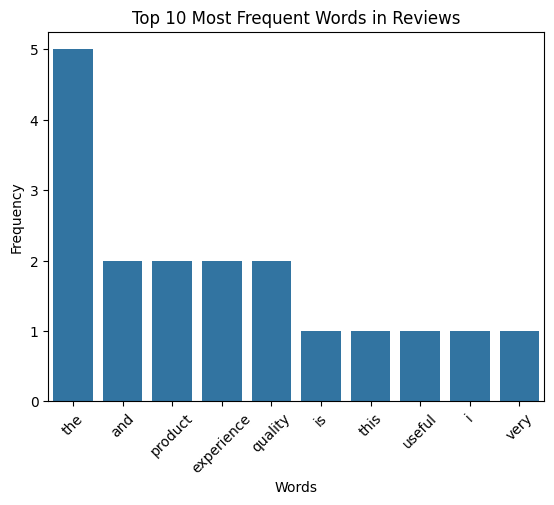

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=words_df.index, y=words_df["count"])

plt.title('Top 10 Most Frequent Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()